In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
url = 'https://dadosabertos.mec.gov.br/images/conteudo/prouni/2020/ProuniRelatorioDadosAbertos2020.csv'

In [4]:
df = pd.read_csv(url, delimiter=';', encoding='ISO-8859-1')

In [5]:
print(df.head())

   ANO_CONCESSAO_BOLSA  CODIGO_EMEC_IES_BOLSA                NOME_IES_BOLSA  \
0                 2020                    322         UNIVERSIDADE PAULISTA   
1                 2020                    163    UNIVERSIDADE ESTÁCIO DE SÁ   
2                 2020                  17670     FACULDADE DE QUIXERAMOBIM   
3                 2020                    203  UNIVERSIDADE SÃO JUDAS TADEU   
4                 2020                    203  UNIVERSIDADE SÃO JUDAS TADEU   

      MUNICIPIO                            CAMPUS TIPO_BOLSA  \
0      IPATINGA                          IPATINGA   INTEGRAL   
1     FORTALEZA               EAD VIA CORPVS - CE   INTEGRAL   
2  QUIXERAMOBIM  FACULDADE DE QUIXERAMOBIM - UNIQ   INTEGRAL   
3     SAO PAULO                          PAULISTA    PARCIAL   
4     SAO PAULO                          PAULISTA   INTEGRAL   

  MODALIDADE_ENSINO_BOLSA NOME_CURSO_BOLSA NOME_TURNO_CURSO_BOLSA  \
0                     EAD        PEDAGOGIA      CURSO A DISTÂNCIA   
1 

In [6]:
# Verificar os nomes das colunas no DataFrame
print(df.columns)


Index(['ANO_CONCESSAO_BOLSA', 'CODIGO_EMEC_IES_BOLSA', 'NOME_IES_BOLSA',
       'MUNICIPIO', 'CAMPUS', 'TIPO_BOLSA', 'MODALIDADE_ENSINO_BOLSA',
       'NOME_CURSO_BOLSA', 'NOME_TURNO_CURSO_BOLSA', 'CPF_BENEFICIARIO',
       'SEXO_BENEFICIARIO', 'RACA_BENEFICIARIO', 'DATA_NASCIMENTO',
       'BENEFICIARIO_DEFICIENTE_FISICO', 'REGIAO_BENEFICIARIO',
       'UF_BENEFICIARIO', 'MUNICIPIO_BENEFICIARIO'],
      dtype='object')


In [7]:
# Transformar os Dados
# Agrupando os dados pela coluna de região
bolsas_por_regiao = df.groupby('REGIAO_BENEFICIARIO')['TIPO_BOLSA'].count()

In [8]:
# Exibindo a distribuição por região
print(bolsas_por_regiao)

REGIAO_BENEFICIARIO
CENTRO-OESTE    13255
NORDESTE        39252
NORTE           16303
SUDESTE         71644
SUL             26376
Name: TIPO_BOLSA, dtype: int64


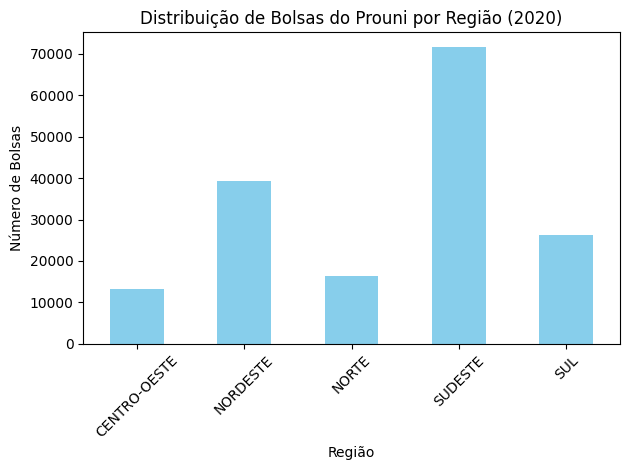

In [9]:
# gráfico de barras
# Gerando gráfico de barras para a distribuição de bolsas por região
bolsas_por_regiao.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Bolsas do Prouni por Região (2020)')
plt.xlabel('Região')
plt.ylabel('Número de Bolsas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('distribuicao_bolsas_por_regiao.png')
plt.show()

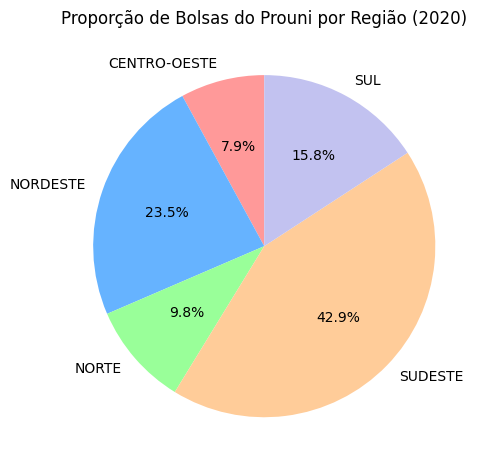

In [10]:
# Gráfico de Pizza - Proporção de Bolsas por Região
# Análise: Este gráfico mostra a proporção de bolsas em cada região, dando uma visão clara de como as bolsas estão distribuídas em relação ao total.

# Gerando gráfico de pizza para a proporção de bolsas por região
bolsas_por_regiao.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Proporção de Bolsas do Prouni por Região (2020)')
plt.ylabel('')
plt.tight_layout()
plt.savefig('proporcao_bolsas_por_regiao.png')
plt.show()

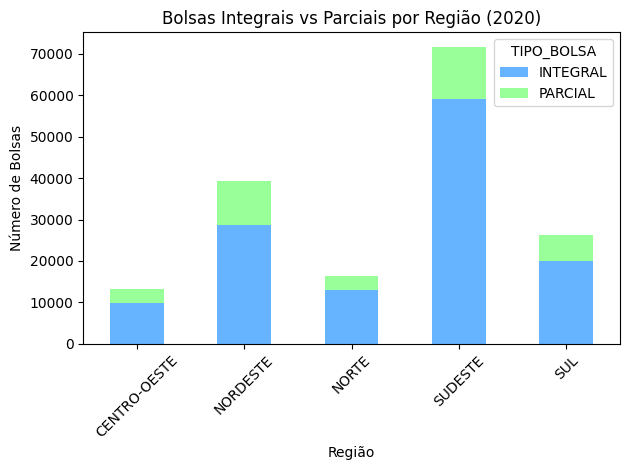

In [12]:
# Gráfico de Barras Empilhadas - Bolsas Integrais vs. Parciais por Região
# Análise: Esse gráfico permite uma comparação direta entre as bolsas integrais e parciais em cada região, ajudando a entender como essas modalidades de bolsa estão distribuídas.
# Agrupando as bolsas integrais e parciais por região
bolsas_por_tipo_regiao = df.groupby(['REGIAO_BENEFICIARIO', 'TIPO_BOLSA']).size().unstack()
# Gerando gráfico de barras empilhadas
bolsas_por_tipo_regiao.plot(kind='bar', stacked=True, color=['#66b3ff', '#99ff99'])
plt.title('Bolsas Integrais vs Parciais por Região (2020)')
plt.xlabel('Região')
plt.ylabel('Número de Bolsas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('bolsas_integral_vs_parcial_por_regiao.png')
plt.show()

In [23]:
# Refazendo o PDF conforme solicitado: nome só na primeira página, texto e gráfico na mesma página após a capa

pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)

# Capa com fundo claro e ajustes no layout
pdf.add_page()
pdf.set_fill_color(230, 240, 255)  # Cor de fundo azul claro
pdf.rect(0, 0, 210, 297, 'F')  # Preenche a página toda com a cor de fundo

# Imagem do Prouni centralizada
pdf.image('img_prouni.png', x=55, y=60, w=100)

# Texto do título centralizado e ajustado
pdf.set_y(180)
pdf.set_font('Arial', 'B', 24)
pdf.cell(200, 10, 'Análise da Distribuição Regional', ln=True, align='C')
pdf.cell(200, 10, 'das Bolsas do Prouni (2020)', ln=True, align='C')



# Página 2 - Texto introdutório e gráfico na mesma página
pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(200, 10, 'Análise da Distribuição Regional das Bolsas (2020)', ln=True, align='C')
pdf.ln(10)

pdf.set_font('Arial', '', 12)
pdf.multi_cell(0, 10, "Este relatório analisa a distribuição regional das bolsas de estudo concedidas pelo Prouni em 2020. "
                      "O objetivo é identificar quais regiões receberam maior e menor número de bolsas, evidenciando as desigualdades "
                      "regionais no acesso ao ensino superior.")
pdf.ln(10)

# Inserindo gráfico na mesma página
pdf.image('distribuicao_bolsas_por_regiao.png', x=10, y=None, w=180)

# Página 3 - Gráfico de pizza
pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(200, 10, 'Proporção de Bolsas por Região', ln=True, align='C')
pdf.image('proporcao_bolsas_por_regiao.png', x=10, y=30, w=180)

# Página 4 - Gráfico de barras empilhadas
pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(200, 10, 'Bolsas Integrais vs Parciais por Região', ln=True, align='C')
pdf.image('bolsas_integral_vs_parcial_por_regiao.png', x=10, y=30, w=180)
# Página com a análise final
pdf.add_page()
pdf.set_font('Arial', '', 12)
pdf.multi_cell(0, 10, "A análise revela que a maior parte das bolsas está concentrada nas regiões Sudeste e Sul, enquanto o Norte e Nordeste, regiões "
                      "com maior vulnerabilidade educacional, recebem proporcionalmente menos bolsas. Essa concentração reflete a desigualdade no "
                      "acesso à educação superior, o que pode ser atribuído à menor quantidade de instituições e à carência de recursos educacionais "
                      "nas regiões mais distantes.")



# Salvando o PDF final
pdf.output('relatorio_ajustado_graficos_helionay_final.pdf')


C:\Users\carlo\AppData\Local\Temp\ipykernel_4628\3942891745.py:16: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', 'B', 24)
C:\Users\carlo\AppData\Local\Temp\ipykernel_4628\3942891745.py:17: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, 'Análise da Distribuição Regional', ln=True, align='C')
C:\Users\carlo\AppData\Local\Temp\ipykernel_4628\3942891745.py:18: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, 'das Bolsas do Prouni (2020)', ln=True, align='C')
C:\Users\carlo\AppData\Local\Temp\ipykernel_4628\3942891745.py:24: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', 'B', 16)
C:\Users\ca